# Demonstration of isodensity lines of dimensional normal distribution using Python

## Importation des librairies nécessaires et déclaration des variables

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

'''Paramètres de la loi normale bidimensionnelle'''
mu = np.array([0, 0])
sigma = np.array([[2, 1], [1, 2]])
mu2 = np.array([0, 0])
sigma2 = np.array([[4, 2], [2, 4]])
mu3 = np.array([0, 0])
sigma3 = np.array([[3, 1.5], [1.5, 3]])




## Calculation and display of isodensity ellipses for each sample size

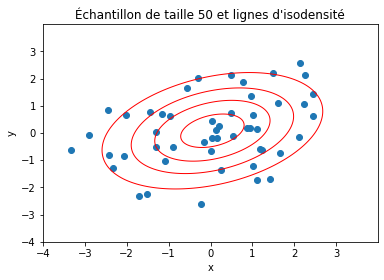

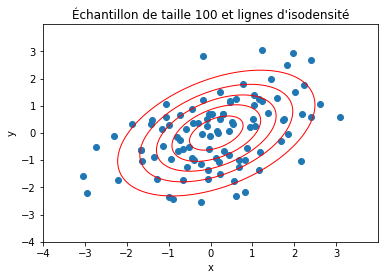

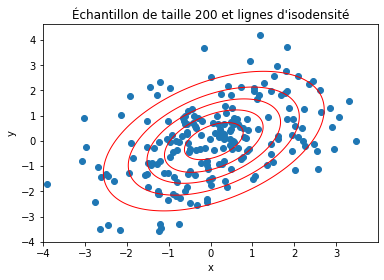

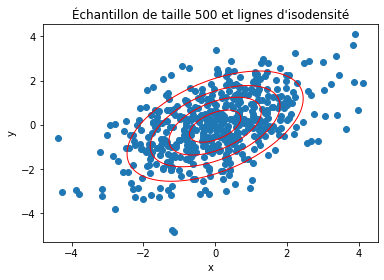

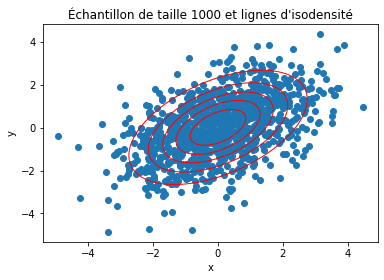

In [19]:
'''Tailles d'échantillons à tester'''
sample_sizes = [50, 100, 200, 500, 1000]

for size in sample_sizes:
    """Génération de l'échantillon"""
    sample = np.random.multivariate_normal(mean=mu, cov=sigma, size=size)

    '''Calcul des estimateurs de mu et sigma'''
    mu_hat = np.mean(sample, axis=0)
    sigma_hat = np.cov(sample, rowvar=False)

    '''Création d'une grille de points'''
    x, y = np.mgrid[-4:4:.01, -4:4:.01]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x
    pos[:, :, 1] = y

    '''Calcul de la densité de probabilité pour chaque point de la grille'''
    rv = multivariate_normal(mu_hat, sigma_hat)
    z = rv.pdf(pos)
    
    '''Affichage du graphique avec l'estimateur'''
    plt.figure()
    plt.scatter(sample[:, 0], sample[:, 1], label='Échantillon')
    plt.contour(x, y, z, levels=5, colors='r', linewidths=1, alpha=1)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Échantillon de taille {size} et lignes d\'isodensité')

    plt.show()


## Convergence of estimators $\Sigma$ and $\mu$

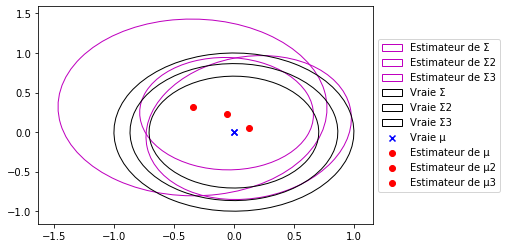

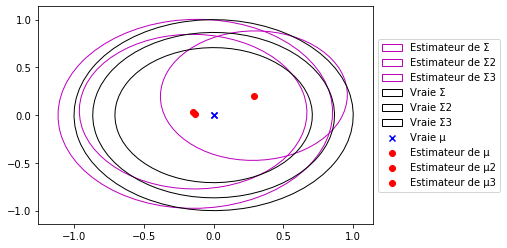

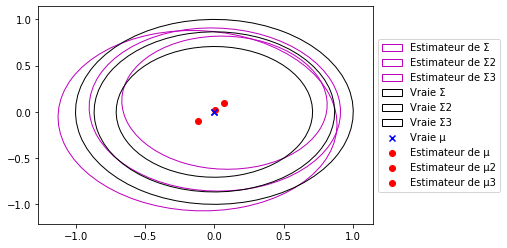

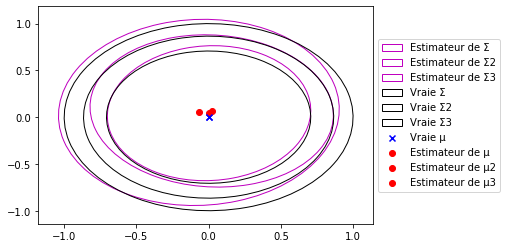

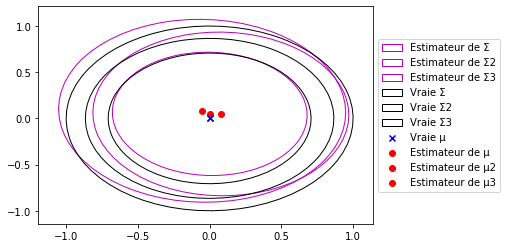

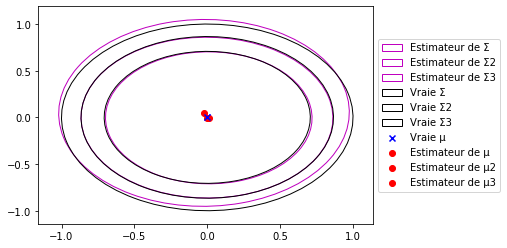

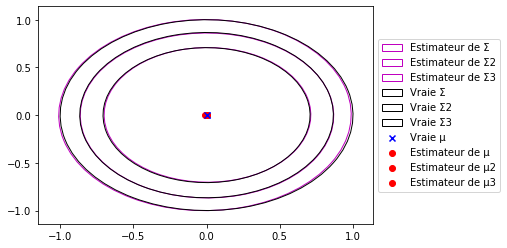

In [20]:
sample_sizes = [50, 100, 200, 500, 1000,10000,100000]

for size in sample_sizes:    
    sample = np.random.multivariate_normal(mean=mu, cov=sigma, size=size)
    sample2 = np.random.multivariate_normal(mean=mu2, cov=sigma2, size=size)
    sample3 = np.random.multivariate_normal(mean=mu3, cov=sigma3, size=size)

    '''Calcul des estimateurs de mu et sigma'''
    mu_hat = np.mean(sample, axis=0)
    sigma_hat = np.cov(sample, rowvar=False)
    mu_hat2 = np.mean(sample2, axis=0)
    sigma_hat2 = np.cov(sample2, rowvar=False)
    mu_hat3 = np.mean(sample3, axis=0)
    sigma_hat3 = np.cov(sample3, rowvar=False)
    
    '''Calcul de la densité de probabilité pour chaque point de la grille'''
    rv = multivariate_normal(mu_hat, sigma_hat)
    z = rv.pdf(pos)    
    rv2 = multivariate_normal(mu_hat2, sigma_hat2)
    z2 = rv.pdf(pos)
    rv3 = multivariate_normal(mu_hat3, sigma_hat3)
    z3 = rv.pdf(pos)

    '''Affichage de μ et Σ (estimations)'''
    plt.scatter(mu[0], mu[1], color='blue', marker='x', label='Vraie μ')
    plt.scatter(mu_hat[0], mu_hat[1], color='red', marker='o', label='Estimateur de μ')
    plt.scatter(mu_hat2[0], mu_hat2[1], color='red', marker='o', label='Estimateur de μ2')
    plt.scatter(mu_hat3[0], mu_hat3[1], color='red', marker='o', label='Estimateur de μ3')
    plt.scatter(mu3[0], mu3[1], color='blue', marker='x')

    '''Affichage de la matrice de covariance (estimation)'''
    ellipse = plt.matplotlib.patches.Ellipse(mu_hat, np.sqrt(sigma_hat[0, 0]), np.sqrt(sigma_hat[1, 1]),
                                             angle=np.degrees(np.arccos(sigma_hat[0, 1] / np.sqrt(sigma_hat[0, 0] * sigma_hat[1, 1]))),
                                             fill=False, color='m', linewidth=1, label='Estimateur de Σ')
    ellipse2 = plt.matplotlib.patches.Ellipse(mu_hat2, np.sqrt(sigma_hat2[0, 0]), np.sqrt(sigma_hat2[1, 1]),
                                             angle=np.degrees(np.arccos(sigma_hat2[0, 1] / np.sqrt(sigma_hat2[0, 0] * sigma_hat2[1, 1]))),
                                             fill=False, color='m', linewidth=1, label='Estimateur de Σ2')    
    ellipse3 = plt.matplotlib.patches.Ellipse(mu_hat3, np.sqrt(sigma_hat3[0, 0]), np.sqrt(sigma_hat3[1, 1]),
                                             angle=np.degrees(np.arccos(sigma_hat3[0, 1] / np.sqrt(sigma_hat3[0, 0] * sigma_hat3[1, 1]))),
                                             fill=False, color='m', linewidth=1, label='Estimateur de Σ3')
    plt.gca().add_patch(ellipse)
    plt.gca().add_patch(ellipse2)
    plt.gca().add_patch(ellipse3)

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    '''Affichage de la matrice de covariance (vraie valeur)'''
    true_ellipse = plt.matplotlib.patches.Ellipse(mu, np.sqrt(sigma[0, 0]), np.sqrt(sigma[1, 1]),
                                                  angle=np.degrees(np.arccos(sigma[0, 1] / np.sqrt(sigma[0, 0] * sigma[1, 1]))),
                                                  fill=False, color='black', linewidth=1, label='Vraie Σ')
    true_ellipse2 = plt.matplotlib.patches.Ellipse(mu2, np.sqrt(sigma2[0, 0]), np.sqrt(sigma2[1, 1]),
                                                  angle=np.degrees(np.arccos(sigma2[0, 1] / np.sqrt(sigma2[0, 0] * sigma2[1, 1]))),
                                                  fill=False, color='black', linewidth=1, label='Vraie Σ2')
    true_ellipse3 = plt.matplotlib.patches.Ellipse(mu3, np.sqrt(sigma3[0, 0]), np.sqrt(sigma3[1, 1]),
                                                  angle=np.degrees(np.arccos(sigma3[0, 1] / np.sqrt(sigma3[0, 0] * sigma3[1, 1]))),
                                                  fill=False, color='black', linewidth=1, label='Vraie Σ3')
    plt.gca().add_patch(true_ellipse)
    plt.gca().add_patch(true_ellipse2)
    plt.gca().add_patch(true_ellipse3)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    '''Affichage de toutes les figures'''
    plt.show()
